In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\data sets\laptoppriceprediction\Laptop_price.csv")

In [5]:
#regressiontypeproblem
df

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459


### preprocessing

In [7]:
df.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [8]:
df.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [9]:
df['RAM_Size'].describe()

count    1000.000000
mean       15.500000
std        10.988665
min         4.000000
25%         8.000000
50%        16.000000
75%        32.000000
max        32.000000
Name: RAM_Size, dtype: float64

In [10]:
#print('Mean value of Processor_Speed is:',df['Processor_Speed'].mean())

In [11]:
df.Brand.unique()

array(['Asus', 'Acer', 'Lenovo', 'HP', 'Dell'], dtype=object)

## EDA

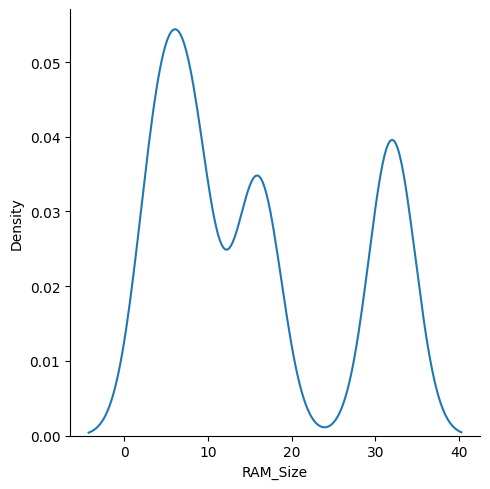

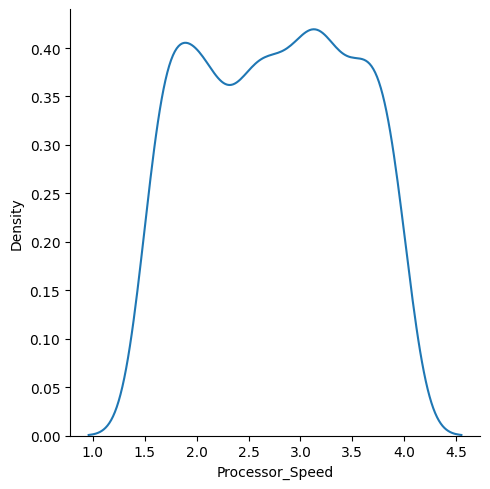

In [12]:
sb.displot(df['RAM_Size'],kind='kde')
sb.displot(df['Processor_Speed'],kind='kde')

<Axes: xlabel='Brand', ylabel='count'>

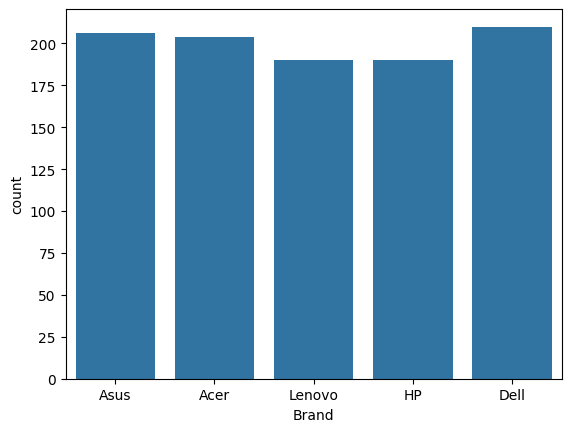

In [13]:
sb.countplot(data=df,x='Brand')

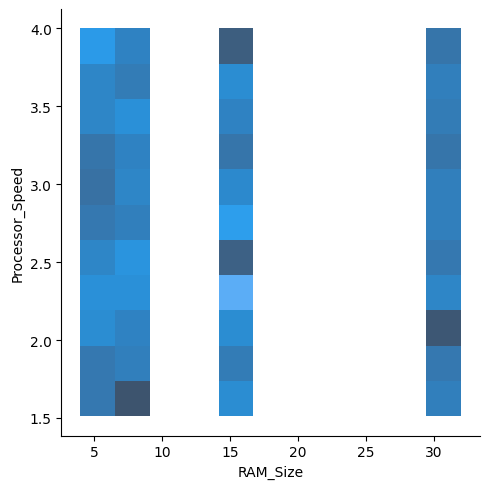

In [14]:
sb.displot(data=df,x='RAM_Size',y='Processor_Speed')

<Axes: xlabel='Processor_Speed'>

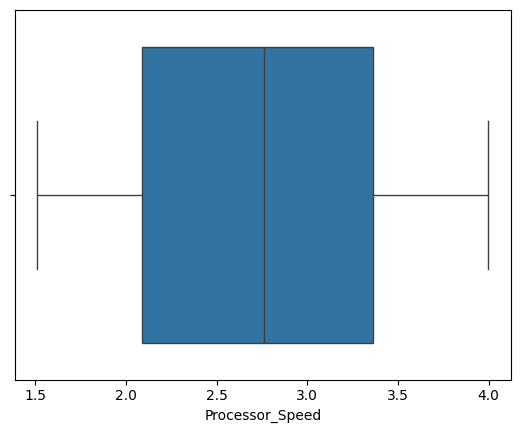

In [15]:
sb.boxplot(data=df,x='Processor_Speed')

<Axes: xlabel='RAM_Size'>

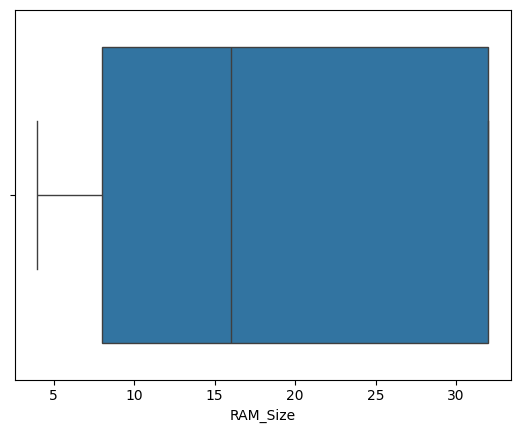

In [16]:
sb.boxplot(data=df,x='RAM_Size')

### Feature Engineering

In [22]:
#feature scaling

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [24]:
mms = ColumnTransformer([('scale',MinMaxScaler(),slice(1,6))])

In [25]:
mms

ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(1, 6, None))])

In [26]:
#extracting i/p and o/p colms

In [27]:
x = df.drop('Price',axis=1)

In [28]:
y = df[['Price']]

In [29]:
x

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight
0,Asus,3.830296,16,512,11.185147,2.641094
1,Acer,2.912833,4,1000,11.311372,3.260012
2,Lenovo,3.241627,4,256,11.853023,2.029061
3,Acer,3.806248,16,512,12.280360,4.573865
4,Acer,3.268097,32,1000,14.990877,4.193472
...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399
996,Dell,2.780555,8,256,12.679356,3.750265
997,Dell,3.200569,4,512,12.666315,3.392612
998,Asus,1.604182,8,256,11.215581,3.857613


In [30]:
y

,Price
0,17395.093065
1,31607.605919
2,9291.023542
3,17436.728334
4,32917.990718
...,...
995,31593.668017
996,9149.521832
997,16552.404779
998,9407.473459


In [31]:
#train test split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8)

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
ohe = ColumnTransformer([('ohe',OneHotEncoder(handle_unknown='ignore'),[0])],remainder='passthrough')

In [36]:
ohe

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe', OneHotEncoder(handle_unknown='ignore'),
                                 [0])])

In [37]:
'''from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr'''

'from sklearn.linear_model import LinearRegression\nlr = LinearRegression()\nlr'

In [38]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr

DecisionTreeRegressor()

In [39]:
#pipeline process
from sklearn.pipeline import make_pipeline

In [40]:
pipe = make_pipeline(mms,ohe,dtr)

In [41]:
pipe

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(1, 6, None))])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [0])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [42]:
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(1, 6, None))])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [0])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [43]:
y_pred = pipe.predict(xtest)

In [44]:
y_pred

array([ 9593.11059218, 17376.01952833, 10601.34544975, 16430.16183141,
       18133.59750991, 18151.5867749 , 16752.81548678, 16947.90421468,
       18286.88859814, 18151.5867749 , 31558.99666383, 31817.73844348,
        9054.15384039, 31558.70620915, 16729.55087503, 31694.40469113,
       17008.98570634, 18156.07811335, 18168.94249971,  9107.98105844,
       17377.64164166, 32307.1907554 , 31815.6405079 , 18028.99908089,
        9071.15239871,  9412.59985713, 32927.59822898, 10174.1952073 ,
       17462.73379144,  8951.26015092, 31747.39378249, 18036.24497657,
       32703.61322522, 31661.07806675, 31553.39887165,  9230.65616269,
        9647.16249839, 31558.99666383, 16947.90421468, 10558.37440012,
        9280.14242169, 16729.55087503, 16631.41956585,  9341.54415475,
        9049.02687179, 31558.99666383, 31553.39887165,  8975.32646628,
       31553.39887165, 17073.49196577,  8957.61138889, 32351.38622794,
        9101.45648981, 16729.55087503,  9555.86703817, 17108.25296177,
      

In [45]:
from sklearn.metrics import r2_score

In [46]:
r2_score(ytest,y_pred)

0.9990034815639397

In [47]:
#from sklearn.metrics import confusion_matrix (can be used for classification type prblm)

In [48]:
import pickle

In [49]:
pickle.dump(pipe,open('laptop_price.pkl','wb'))

In [50]:
f = open('laptop_price.pkl','rb')

In [51]:
f1 = pickle.load(f)

In [52]:
df

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459


In [53]:

f1.predict([['Asus',3.830296,16,512	,11.185147,	2.641094]])

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([17406.84907652])

In [54]:
#to run the interface
#!streamlit run laptopinterface.py